# Notes on Correlation and Related Stuff ¶
> "Here are some notes on correlation and related measures such as predictive power score. These can be used for exploring your data prior to modeling or just for analysis"

- toc: false
- image: /images/iris_pairwise.png
- author: "Dwight Gunning"
- branch: master
- badges: true
- comments: true

## 1 Overview
When starting a data science project, you will want to understand the data that you have, how they are related, and whether it would be feasible to extract patterns from the data. One measure commonly used is **correlation** - which tells you the strength of the relationship among the data. 

This artical looks at ways to measure data relationships, using various measures of **correlation**, and some related measures that might be better such as **predictive power score**

![Iris Pairwise](../images/iris_pairwise.png)

## 2 Finding and Loading Datasets
The `sklearn.datasets` package contains several functions to load datasets. These functions are used throughout the scikit-learn documentation of the various algorithms. These datasets are easy to use, and in any event it is quite a useful skill to know how to load sample datasets from the different machine learning libraries.

The code below lists the datasets in the `sklearn.datasets` package.

#### Tip: Use the `dir` function to list the contents of a package

In [1]:
import pandas as pd
import re
import sklearn.datasets
from sklearn.datasets import load_iris

pd.DataFrame({'some scikit-learn functions to load data' : 
            [m for m in dir(sklearn.datasets) if re.match('fetch|make|load', m)] 
             }
            ).sample(12).style.hide_index()       

some scikit-learn functions to load data
load_sample_images
fetch_20newsgroups_vectorized
load_iris
load_files
make_swiss_roll
fetch_species_distributions
fetch_covtype
load_boston
make_s_curve
fetch_20newsgroups


## 3 Load Iris Data
We will choose the iris dataset since it is a small, easy to understand dataset that is commonly used for examples in **scikit-learn** and other machine learning libraries. We use the `load_iris` function to load the iris data. The function parameters `return_X_y`, and `as_frame` are self-explanatory, but pay attention to what they do, as it affects the shape of your data and how you can do machine learning afterwards.


In [2]:
X, y = load_iris(return_X_y=True, as_frame=True)
X.describe().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


There are four features - **sepal length**, **sepal width**, **petal length** and **petal width**. These are all numeric, continuous features, and there are no  missing values, which makes it easier to compute correlation.

## 4 About Correlation
Correlation is a way of measuring how closely your data items are reated. If you have a dataframe, the easiest way to compute the correlation among your features is to use the dataframe `corr`. Within the `corr` function there are three methods used to calculate correlation. 

#### Pearson
- There is a linear relationship
- The data is normal
- For *interval* or *ratio* data - not for *categorical* or *ordinal* data

#### Spearman
- *Interval* or *ratio* or *ordinal* data - not for *categorical*
- Monotonic relationship - either always increasing or always decreasing

![Monotonic](../images/monotonic.png)

#### Kendall
 - Ordinal data 
 - The data does **not** have to be normal
 - Returns values from **0 : no relationship** to **1 : perfect relationship**. (Oddly, Kendall can produce negative values which can be ignored)


|  Type of data |   Description | Correlation Method |
|----:|----:|----:|
|   Interval |   Numeric data measured along a regular range e.g. temperature  |Pearson, Spearman|
|   Ratio |   Numeric data, but 0 means there are none of that variable  |Pearson, Spearman|
|   Ordinal |   Categorical data that can be ordered e.g."How much do you like ice cream" |Kendall, Spearman|
|   Nominal |   Data with two or more categories e.g. "What type of house do you live in"||

### 4.1 Chart using different correlation methods
The pandas dataframe `corr` function computes the correlation using one of 3 methods. **Pearson** is the default, standard measure. **Spearman** and **Kendall** are recommended if there are concerns about whether the data is normal. 

In [3]:
import seaborn as sns

def chart_correlation(data, method='pearson'):
    # Calculate the correlation among the columns
    X_corr = X.corr(method=method) 
    
    # Use only two decimal places. You don't need to but looks nicer
    with pd.option_context('display.precision', 2):
        
        # Use a sea green color palette
        cm = sns.light_palette("seagreen", as_cmap=True)
        
        return (
                X_corr # This is all the method needs to return
                       # But styling makes it look nicer
                    .style.background_gradient(cmap=cm, 
                                               low=-0.6,
                                                high=0.2)
                .set_caption(f'Iris dataset - {method} correlation')
               )

#### Pearson Correlation
This is the default and which you will use most often.

In [4]:
chart_correlation(X)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.00,-0.12,0.87,0.82
sepal width (cm),-0.12,1.00,-0.43,-0.37
petal length (cm),0.87,-0.43,1.00,0.96
petal width (cm),0.82,-0.37,0.96,1.00


#### Spearman Correlation

In [5]:
chart_correlation(X, 'spearman')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.00,-0.17,0.88,0.83
sepal width (cm),-0.17,1.00,-0.31,-0.29
petal length (cm),0.88,-0.31,1.00,0.94
petal width (cm),0.83,-0.29,0.94,1.00


#### Kendall Correlation
Kendall is generally used for ordinal data. The iris data is not ordinal, but this method still produces a heatmap that looks similar to the other methods. Note that the Kendall method can produce negative numbers, but the sign can be ignored since the Kendall range is between 0 and 1 - with 1 being perfect correlation.

In [6]:
chart_correlation(X, 'kendall')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.00,-0.08,0.72,0.66
sepal width (cm),-0.08,1.00,-0.19,-0.16
petal length (cm),0.72,-0.19,1.00,0.81
petal width (cm),0.66,-0.16,0.81,1.00


## 5. Pairwise Plots
A **pairwise plot** is a series of plots showing the correlation of each variable against each other. This can be done using **seaborn**'s `pairplot` function. Here we use it to plot the features of the iris dataset, and this provides visual clues as to how the features are related.

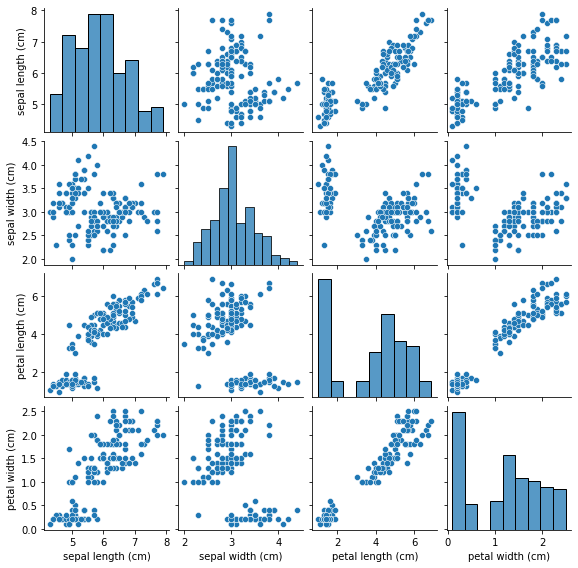

In [7]:
sns.pairplot(X, height=2);

### 5.1 Adding more information - the species
To gain more utility from the pairplot we can add the target variable - which denotes the species - and then use a `hue` parameter to add this as colors to the pairplot. With this new information we can see how each of the species is distributed by feature. This gives us a visual cue that the target variable - species - can be detected by a machine learning algorithm.

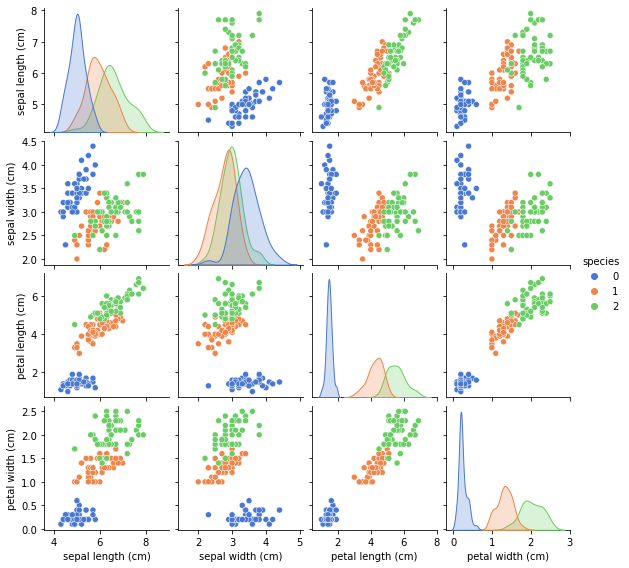

In [8]:
# Add the species to the dataframe. We will use this to color the pairplot
iris_data = pd.concat([X,y], axis=1).rename(columns=({'target':'species'}))
# Set the hue to 'species'
sns.pairplot(iris_data, 
                 hue='species', 
                 palette=sns.color_palette("muted",3), 
                 height=2);

## 6 Distance Correlation


**Distance correlation**, first introduced by Gábor J. Székely in 2005, measures the dependence between two pairs of random vectors or arbitrary, if not equal dimension. It fixes some of the issues with Pearson correlation. Distance correlation has been found to have higher statistical power (fewer false positives than Pearson), to find non-linear associations.

Distance correlation ranges from **0-2**. 0 means **perfect correlation**, 1 means **no correlation** and 2 being **perfect anticorrelation**. A small correlation means that the points are close in correlational space.

Distance Correlation was further elaborated on by Donald Richards, a professor at Penn State University. In his paper Donald Richards discussed two examples of using distance correlation to good effect. In his first example, Mercedes Richards, an astrphysics professor (also his late wife), used distance correlation to resolve galaxies of different shapes e.g. horseshoe, or spiral galaxies - with greater accuracy than when using Pearson correlation.

For his second example, Donald Richards reported that Washington Post reporter had found using Pearson correlation almost no relationship between homicide rates and the strength of state gun laws. However, using distance correlation, and partitioning by population  the states by region and/or population density, Richards found a strong statistical relationship. 

Donald Richards is of Jamaican descent, and is also a very good writer. His statistical paper begins 

*The difficulties of detecting association, measuring correlation, and establishing cause and effect have fascinated mankind since time immemorial. Democritus, the Greek philosopher, underscored well the importance and the difficulty of proving causality when he wrote, “I would rather discover one cause than gain the kingdom of Persia”*

Also, when referring to homicide-gun law link

"*As sure as my first name is “Donald”, this part of the talk will be Huge*"

### 6.1 Visual Comparison of Distance Correlation and Pearson Correlation

#### Distance Correlation
![Distance Correlation Examples](../images/distance_correlation_examples.png)

#### Pearson Correlation

![Distance Correlation Examples](../images/pearson_correlation_examples.png)

### 6.2 Function to Chart Distance Correlation

In [9]:
from scipy.spatial import distance

In [10]:
def chart_distance_correlation(data):
    dist_corr = lambda column1, column2: distance.correlation(column1, column2)
    result = data.apply(lambda col1: data.apply(lambda col2: dist_corr(col1, col2)))
    with pd.option_context('display.precision', 2):
        
        # Use a sea green color palette
        cm = sns.light_palette("seagreen", as_cmap=True)
        return (
            result.style.background_gradient(cmap=cm, low=-0.1, high=0.2)
                .set_caption(f'Iris dataset - distance correlation')
        )
    
chart_distance_correlation(X)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.00,1.12,0.13,0.18
sepal width (cm),1.12,0.00,1.43,1.37
petal length (cm),0.13,1.43,0.00,0.04
petal width (cm),0.18,1.37,0.04,0.00


### 6.3 Distance Correlation Links

**[dcor distance correlation Library](https://dcor.readthedocs.io/en/latest/index.html)**

**[Scpiy distance correlation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.correlation.html#scipy.spatial.distance.correlation)**

**[Distance Correlation: A New Tool for Detecting Associations - Donald Richards](https://arxiv.org/abs/1709.06400)**

**[Profile of Donald Richards - Quanta Magazine](https://www.quantamagazine.org/donald-richards-seeks-patterns-in-the-data-of-life-and-the-universe-20180411/)**

**[Distance Correlation Wikipedia](https://en.wikipedia.org/wiki/Distance_correlation)**

**[StackOverflow Distance Correlation](https://stackoverflow.com/questions/35988933/scipy-distance-correlation-is-higher-than-1)**

## 7 Predictive Power Score - A Better Correlation

**Predictive Power Score - ppscore** - is a new measure of how data features are related. It answers the question - how much can **A** be used to predict **B**

It is an improvement over correlation in a few important respects. 


1. Most importantly, it works on **categorical** data - which none of the 3 correlation methods looked at above does.
2. It is **asymmetric**, meaning if can tell you the strength of a relationship between variables in both directions. So the ppscore for how much feature A can predict B is different for the ppscore for B predicting A. This gives you more information to use to decide how to do your modeling
3. It measures strength of non linear relationships - correlation only measures linear relationships

PP score is related to but different from Feature Importance. Feature importance scores normally take into account all features when calculating the score for an indivicual feature, while PP score ie is calculated on just that feature.

### 7.1 Using the ppscore library
Predictive Power Score is implemented in the new **ppscore** library. First you install the library

```
pip install ppscore
```

If you have a dataframe df you can use `pps.score` to measure x predicting y

```
pps.score(df, "x", "y")
```

**[RIP Correlation - Hello Predictive Power Score](https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598)**

**[ppscore on github](https://github.com/8080labs/ppscore)**

### 7.2 Charting the ppscore

In [ ]:
import ppscore as pps

cm = sns.light_palette("seagreen", as_cmap=True)
pps.matrix(X)[['x', 'y', 'ppscore']]\
            .pivot(columns='x', index='y', values='ppscore')\
            .style.background_gradient()\
            .set_precision(3)\
            .set_caption('Predictive Power Score')


## Conclusion
In these notes we showed what correlation is, various ways to measure it, and a new way - **Predictive Power Score** to get improvements over standard correlation functions